<a href="https://colab.research.google.com/github/lcbjrrr/fiap-bdt-ml/blob/master/Cielo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/notas%20-%20ok.csv')
treino.head(2)

,AP1,AP2,AP3,Final
0,10.0,10.0,9.0,9.8
1,9.0,10.0,9.0,9.4


In [ ]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit( treino[['AP1',	'AP2']] , treino['AP3'] )
print(reglin.coef_ , reglin.intercept_)

[-0.36608176  1.38338992] -0.8257714929014783


In [ ]:
def prever_ap3(ap1,ap2):
  ap3 = ap1*-0.36608176 + ap2*1.38338992 + -0.8257714929014783
  return ap3

In [ ]:
print(prever_ap3(8,8))
print(prever_ap3(2,4))
print(prever_ap3(3.5,8))

7.312693787098522
3.975624667098521
8.960061707098522


In [ ]:
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/notas-rl%20-%20test.csv')
teste

In [ ]:
prev_teste = reglin.predict(teste[['AP1',	'AP2']])
prev_teste

array([7.31269382, 3.97562468, 8.96006172])

In [ ]:
from sklearn import metrics
r2_teste = metrics.r2_score(teste['AP3'],prev_teste)
print('R2 Teste',r2_teste)

R2 Teste 0.9921078963709334


In [ ]:
r2_treino = reglin.score( treino[['AP1',	'AP2']] , treino['AP3'] )
print('R2 Treino', r2_treino)

R2 Treino 0.9818896713333346


In [ ]:
mse = metrics.mean_squared_error(teste['AP3'],prev_teste)
print('MSE Teste',mse)
print('RMSE Teste',mse**(1/2))

MSE Teste 0.0333222153227253
RMSE Teste 0.18254373536970614


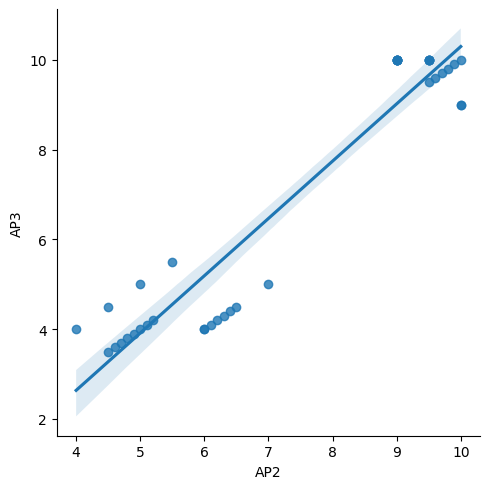

In [ ]:
import seaborn as sns
sns.lmplot(data=treino,x='AP2',y='AP3')

In [ ]:
treino.corr()

,AP1,AP2,AP3,Final
AP1,1.000000,0.278632,0.003717,0.630113
AP2,0.278632,1.000000,0.952691,0.920175
AP3,0.003717,0.952691,1.000000,0.776387
Final,0.630113,0.920175,0.776387,1.000000


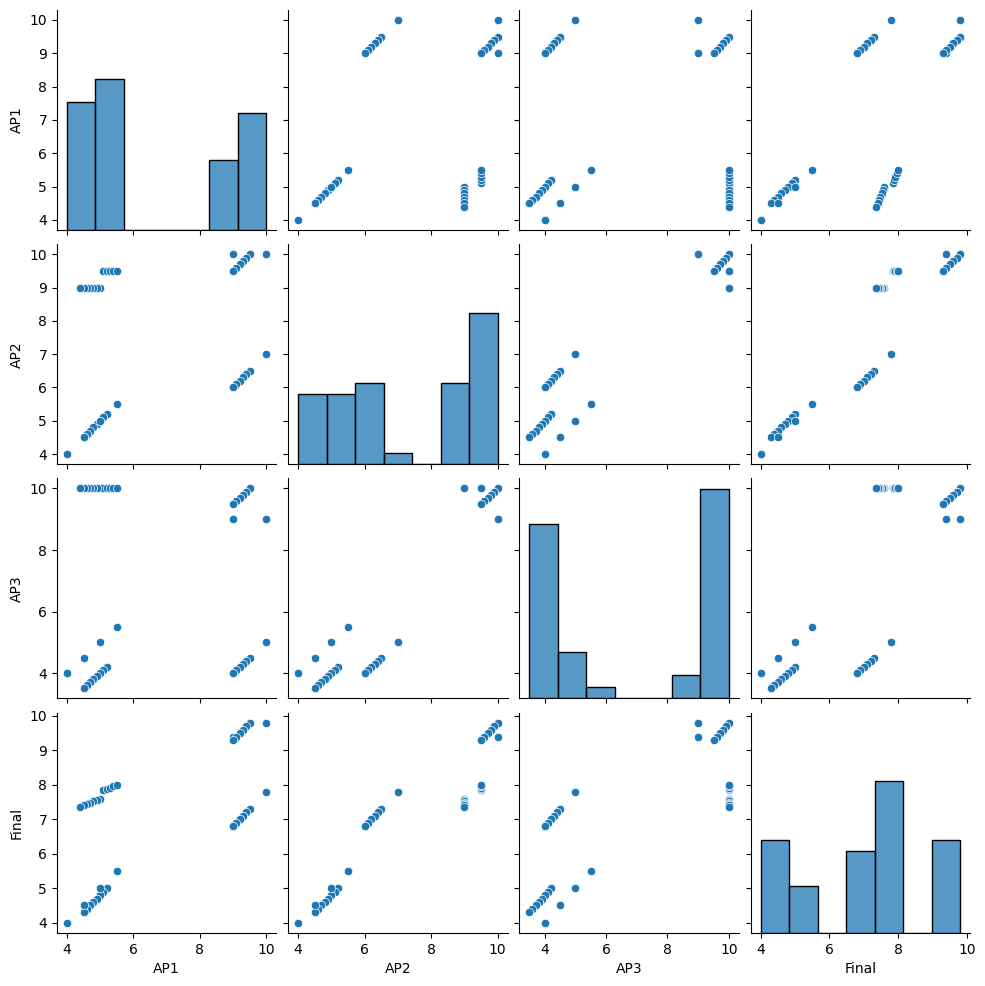

In [ ]:
sns.pairplot(treino)

In [ ]:
import pandas as pd
bovdol = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/usd_ibov_20%20-%2020.csv')
bovdol.head(2)

,Date,usd,bov
0,1/2/2020,4.0249,118.57310
1,1/3/2020,4.0668,117.70666



)Será que existe alguma relação entre a cotação do dólar e a índice da Bovespa (IBOV)?

Dado o indice de correção há uma forte relação entre o Dolar e a Bovespa


In [ ]:
bovdol.corr()

<ipython-input-33-848de1ca40cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bovdol.corr()


,usd,bov
usd,1.000000,-0.928005
bov,-0.928005,1.000000



)Essa relação é diretamente proporcional (positiva) ou negativa?

A relação é Negativa


In [ ]:
bovdol.corr()

<ipython-input-34-848de1ca40cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bovdol.corr()


,usd,bov
usd,1.000000,-0.928005
bov,-0.928005,1.000000



) Qual o racional econômico que explica essa relação?

Ao retirar o dinheiro dos investimentos para fora do pais, deve-se fazer o cambio para dolar. Ou seja, retirar investimento da Bovespa aumenta o preço do dolar pois há maior procura

) Crie então sua máquina para prever o futuro do dólar base na cotação do índice IBOV




In [ ]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(bovdol[['bov']],bovdol['usd'])
print(reglin.coef_, reglin.intercept_)
reglin.score(bovdol[['bov']],bovdol['usd'])

[-0.01783154] 6.303900300544503


0.8611940551207034

)
 A Bolsa hoje está em quanto? E o dólar? Se o IBOV chegar em 100 mil pontos, qual o valor do dólar previsto?

In [ ]:

#Bovespa = 127.69062
#Dolar = 4,99
dol = 100.000*-0.01783154+6.303900300544503
print(dol)

dol = 127.69062*-0.01783154+6.303900300544503
print(dol)


4.520746300544503
4.026979902389703


In [ ]:

bov = pd.DataFrame({'bov':[100.000,127.69062]})
bov

,bov
0,100.00000
1,127.69062


In [ ]:

prev_teste = reglin.predict(bov[['bov']])
prev_teste

array([4.52074588, 4.02697936])

) Qual o racional econômico que explica essa relação?

Ao retirar o dinheiro dos investimentos para fora do pais, deve-se fazer o cambio para dolar. Ou seja, retirar investimento da Bovespa aumenta o preço do dolar pois há maior procura